In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [2]:
RANDOM_STATE = 42

In [3]:
dataset = load_boston()
X = pd.DataFrame(dataset.data)
X.columns = dataset.feature_names
y = dataset.target

/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

1. Разделите выборку на обучающую и тестовую в отношении 80%/20%

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

2. Обучите стандартную регрессию, а также Ridge и Lasso и параметрами по умолчанию и выведите их R2 на тестовой выборке

In [5]:
# Ridge
model_Ridge = Ridge().fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
y_pred_train = model_Ridge.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_test, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))
print("r2: %.3f" % r2_score(y_pred, y_test))

Качество на валидации: 14.775
Качество на обучении: 22.924
r2: 0.756


In [6]:
# Lasso
model_Lasso = Lasso().fit(X_train, y_train)
y_pred_Lasso = model_Lasso.predict(X_test)
y_pred_train_Lasso = model_Lasso.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_test, y_pred_Lasso))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train_Lasso))
print("r2: %.3f" % r2_score(y_pred_Lasso, y_test))

Качество на валидации: 18.645
Качество на обучении: 27.607
r2: 0.614


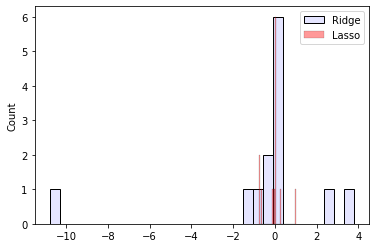

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(model_Ridge.coef_, color='b', bins=30, alpha=0.1,label='Ridge')
sns.histplot(model_Lasso.coef_, color='r', bins=30, alpha=0.4, label='Lasso')
plt.legend()
plt.show()

In [8]:
# Линейная регрессия
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred
print("r2: %.3f" % r2_score(y_pred, y_test))

r2: 0.755


3. Для Ridge и Lasso подберите коэффициент регуляризации(используйте GridSearchCV, RidgeCV, LassoCV) в пределах от  до  (по степеням 10). Посчитайте R2 на тестовой выборке по лучшим моделям и сравните с предыдущими результатами. Напишите как изменился результат

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV

params = [0.1, 1, 10]

In [10]:
# модель лассо
grid_Lasso = GridSearchCV(model_Lasso, {'alpha':[0.1, 1, 10]}, cv=7)
y_pred = grid_Lasso.fit(X_train, y_train).predict(X_test)

print('Best Number Of Components:', grid_Lasso.best_estimator_.get_params())
print("r2_grid: %.3f" % r2_score(y_pred, y_test))

grid_LassoCV = LassoCV(alphas=params)
y_pred_Lasso = grid_LassoCV.fit(X_train, y_train).predict(X_test)

print("r2_lassoCV: %.3f" % r2_score(y_pred_Lasso, y_test))

Best Number Of Components: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
r2_grid: 0.737
r2_lassoCV: 0.737


In [11]:
# модель ridge
grid_Ridge = GridSearchCV(model_Ridge, {'alpha':[0.1, 1, 10]}, cv=10)
y_pred = grid_Ridge.fit(X_train, y_train).predict(X_test)

print('Best Number Of Components:', grid_Ridge.best_estimator_.get_params())
print("r2_grid: %.3f" % r2_score(y_pred, y_test))

grid_RidgeCV = RidgeCV(alphas=params)
y_pred_Ridge = grid_RidgeCV.fit(X_train, y_train).predict(X_test)

print("r2_ridgeCV: %.3f" % r2_score(y_pred_Ridge, y_test))

Best Number Of Components: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
r2_grid: 0.755
r2_ridgeCV: 0.755


In [12]:
# коэффициент детерминации увеличился по модели Lasso  на 0.12, по модели Ridge остался такой же

4. Проведите масштабирование выборки(используйте Pipeline, StandardScaler, MinMaxScaler), посчитайте R2 и сравните с предыдущими результатами. Напишите как изменился результат

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
from sklearn.decomposition import PCA


std_slc = StandardScaler()
pca = decomposition.PCA()
min_max_scaler = MinMaxScaler()

linear = LinearRegression()
pipe_std_slc = Pipeline(steps=[('std_scl', std_slc),
                       ('pca', pca),
                       ('linear', linear)])

pipe_std_slc.fit(X_train, y_train)
print("r2_std: %.3f" % pipe_std_slc.score(X_test,y_test))

pipe_min_max_scaler = Pipeline(steps=[('min_max', min_max_scaler),
                              ('pca', pca),
                              ('linear', linear)])

pipe_min_max_scaler.fit(X_train, y_train)
print("r2_min_max: %.3f" % pipe_min_max_scaler.score(X_test,y_test))


# n_components = list(range(1,X.shape[1]+1,1))
# normalize = [True, False]
# param = dict(pca__n_components=n_components,
#                       linear__normalize=normalize)

# grid = GridSearchCV(pipe, param_grid=param, cv=10)
# y_pred = grid.fit(X_train, y_train).predict(X_test)
# print('Best Number Of Components:', grid.best_estimator_.get_params()['pca__n_components'])
# print(grid.best_estimator_.get_params()['linear'])

# print("r2: %.3f" % r2_score(y_pred, y_test))

r2_std: 0.760
r2_min_max: 0.760


In [14]:
# Результат линейной регрессии увеличился на 0.01 и является лучшим среди моделей lasso и ridge

5. Подберите коэффициент регуляризации для Ridge и Lasso на масштабированных данных, посчитайте R2 и сравните с предыдущими результатами. Напишите как изменился результат

In [15]:
# Создадим цикл для моделей
for model in [grid_Ridge, grid_Lasso, grid_RidgeCV, grid_LassoCV]:
    pipe = Pipeline([('std_scl', std_slc), ('min_max', min_max_scaler), ('lgs', model) ])
    pipe.fit(X_train, y_train)
    r2 = pipe.score(X_test,y_test)
    print(f"Для {model:} \n R2 : {r2:.8f}")

Для GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]}) 
 R2 : 0.76963321
Для GridSearchCV(cv=7, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10]}) 
 R2 : 0.73968725
Для RidgeCV(alphas=array([ 0.1,  1. , 10. ])) 
 R2 : 0.76142815
Для LassoCV(alphas=[0.1, 1, 10]) 
 R2 : 0.73968725


/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [16]:
# Самая точная модель на этом этапе это модель GridSearchCV с estimator=Ridge - R2 : 0.769
# Менее точная модель на этом этапе это модель LassoCV - R2 : 0.739

6. Добавьте попарные произведения признаков и их квадраты (используйте PolynomialFeatures) на масштабированных признаках, посчитайте R2 и сравните с предыдущими результатами. Напишите как изменился результат

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

# Создадим цикл для моделей
for model in [grid_Ridge, grid_Lasso, grid_RidgeCV, grid_LassoCV]:
    pipe = Pipeline([('std_scl', std_slc), ('min_max', min_max_scaler), ('poly', poly), ('lgs', model) ])
    pipe.fit(X_train, y_train)
    r2 = pipe.score(X_test,y_test)
    print(f"Для {model:} \n R2 : {r2:.8f}")

Для GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]}) 
 R2 : 0.89408948
Для GridSearchCV(cv=7, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10]}) 
 R2 : 0.80476041
Для RidgeCV(alphas=array([ 0.1,  1. , 10. ])) 
 R2 : 0.89408948
Для LassoCV(alphas=[0.1, 1, 10]) 
 R2 : 0.80476041


/Users/olgakamskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [18]:
# Модели GridSearchCV с estimator=Ridge и RidgeCV сравнялись и показывают лучший результат - R2 : 0.894
# Модели GridSearchCV с estimator=Lasso и LassoCV тоже сравнялись, но показывают резултат меньше - R2 : 0.804

7. Подберите наилучшую модель (используйте Pipeline, GridSearchSCV) подбирая тип регуляризации (L1,L2), коэффициент регуляризации, метод масштабирования и степень полинома в PolynomialFeatures. Выведите итоговые параметры и результат R2. Напишите как изменился R2 по сравнению с предыдущими экспериментами

In [19]:
degree = [d for d in range(1,5)]
# parameters = [10**i for i in range(-5,6,1)]
grid_Ridge = GridSearchCV(model_Ridge, {'alpha':params, 'tol' : [0.1,0.5]}, scoring='r2')
grid_Lasso = GridSearchCV(model_Lasso, {'alpha':params, 'tol' : [0.1,0.5]}, scoring='r2')

for model in [grid_Ridge,grid_Lasso]:
    for deg in degree:
        pipe = Pipeline([('std_scl', std_slc),('poly', PolynomialFeatures(deg)), ('lgs', model)])
        pipe.fit(X_train, y_train)
        r2 = pipe.score(X_test,y_test)
        print(f"Для degree = {deg:} and {model.best_params_:} \n R2 : {r2:.8f}")


Для degree = 1 and {'alpha': 1, 'tol': 0.1} 
 R2 : 0.76032966
Для degree = 2 and {'alpha': 10, 'tol': 0.1} 
 R2 : 0.88590955
Для degree = 3 and {'alpha': 10, 'tol': 0.1} 
 R2 : 0.86960164
Для degree = 4 and {'alpha': 10, 'tol': 0.1} 
 R2 : 0.76189822
Для degree = 1 and {'alpha': 0.1, 'tol': 0.1} 
 R2 : 0.75639577
Для degree = 2 and {'alpha': 0.1, 'tol': 0.1} 
 R2 : 0.89470123
Для degree = 3 and {'alpha': 0.1, 'tol': 0.1} 
 R2 : 0.88517921
Для degree = 4 and {'alpha': 0.1, 'tol': 0.5} 
 R2 : 0.84495225


In [20]:
# Лучший результат - R2 : 0.8947. Лучшие параметры: L2 регуляризация, степень полинома - 2, альфа - 0.1

http://archive.ics.uci.edu/ml/datasets/Adult

In [21]:
link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv'

data = pd.read_csv(link, header=None)

In [22]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. Выясните выборку на признаки и целевую переменную(колонка со зачениями {<=50K,>50K}). Замените целевую переменную на числовые значения.

In [23]:
clmn = data.columns
X = data[clmn[:-1]]
y = data[clmn[-1:]].applymap(lambda x: 0 if str(x) == "<=50K" else 1)

2. Выясните, присутствуют ли в данных пропуски. Заполните их самыми частыми значениями (испольуйте SimpleImputer)

In [24]:
from sklearn.impute import SimpleImputer

miss = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
miss

SimpleImputer(strategy='most_frequent')

3. Выберите колонки с числовыми и категориальными переменными.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48842 non-null  int64 
 1   1       48842 non-null  object
 2   2       48842 non-null  int64 
 3   3       48842 non-null  object
 4   4       48842 non-null  int64 
 5   5       48842 non-null  object
 6   6       48842 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  int64 
 11  11      48842 non-null  int64 
 12  12      48842 non-null  int64 
 13  13      48842 non-null  object
 14  14      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
int_ = [0, 2, 4, 10, 11, 12]
obj_ = [1, 3, 5, 6, 7, 8, 9, 13]

4. Создайте пайплайн по обработке колонок(используйте OneHotEncoder,MinMaxScaler).

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(dtype='object')
min_max_scale = MinMaxScaler()

col_trans = ColumnTransformer([('int_', min_max_scale, int_),('cat_', encoder, obj_)])

pipe = Pipeline([('miss', miss),('col_trans', col_trans)])

5. Посчитайте метрики accuracy и f1_score на предсказании только самого частого класса в целевой переменной.

In [28]:
from sklearn.metrics import f1_score , accuracy_score

y_pred = pd.DataFrame(np.zeros(y.shape[0]))

print("f1_score: %.3f" % f1_score(y_pred, y))
print("accuracy_score: %.3f" % accuracy_score(y_pred,y))

f1_score: 0.000
accuracy_score: 0.761


6. Посчитайте cross_val_score по алгоритмам LogisticRegression, SVC, LinearSVC по метрикам accuracy и f1_score. Напишите удалось ли превзойти предыдущий результат.

In [29]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=150, penalty="elasticnet", solver="saga", l1_ratio=0.5)
linear_svc = LinearSVC()
svc = SVC()

pipe_lr = Pipeline([('miss', miss),('col_trans', col_trans),('lr', lr)])
pipe_linear_svc = Pipeline([('miss', miss),('col_trans', col_trans),('linear_svc', linear_svc)])
pipe_svc = Pipeline([('miss', miss),('col_trans', col_trans),('svc', svc)])

In [30]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
cross_lr_f1 = cross_val_score(pipe_lr, X_train, y_train[14],scoring="f1")
cross_lr_accuracy = cross_val_score(pipe_lr, X_train, y_train[14],scoring="accuracy")
print("Среднее значение метрики f1 LogisticRegression : %.3f" % cross_lr_f1.mean())
print("Среднее значение метрики accuracy LogisticRegression : %.3f" % cross_lr_accuracy.mean())
print('')

cross_linear_svc_f1 = cross_val_score(pipe_linear_svc, X_train, y_train[14],scoring="f1",n_jobs=5, cv=10)
cross_linear_svc_accuracy = cross_val_score(pipe_linear_svc, X_train, y_train[14],scoring="accuracy",n_jobs=5,cv=5)
print("Среднее значение метрики f1 LinearSVC : %.3f" % cross_linear_svc_f1.mean())
print("Среднее значение метрики accuracy LinearSVC : %.3f" % cross_linear_svc_accuracy.mean())
print('')

cross_svc_f1 = cross_val_score(pipe_svc, X_train, y_train[14],scoring="f1",n_jobs=5, cv=10)
cross_svc_accuracy = cross_val_score(pipe_svc, X_train, y_train[14],scoring="accuracy",n_jobs=4, cv=3)
print("Среднее значение метрики f1 SVC : %.3f" % cross_svc_f1.mean())
print("Среднее значение метрики accuracy SVC : %.3f" % cross_svc_accuracy.mean())



Среднее значение метрики f1 LogisticRegression : 0.657
Среднее значение метрики accuracy LogisticRegression : 0.852

Среднее значение метрики f1 LinearSVC : 0.658
Среднее значение метрики accuracy LinearSVC : 0.853

Среднее значение метрики f1 SVC : 0.619
Среднее значение метрики accuracy SVC : 0.840


In [32]:
# метрика f1 приняла значение от 0.619 до 0.658
# метрика accuracy увеличилась с 0.761 до 0.853 с алгоритмом LinearSVC()

7. Можно заметить что в данных присутствуют значения '?', замените их самыми частыми значениями (испольуйте SimpleImputer)

In [33]:
symb_qustion = SimpleImputer(missing_values={np.nan,'?'}, strategy='most_frequent')

lr = LogisticRegression(max_iter=150, penalty="elasticnet", solver="saga", l1_ratio=0.5)
linear_svc = LinearSVC()
svc = SVC()

pipe_lr_symb_q = Pipeline([('symb_qustion', symb_qustion),('col_trans', col_trans),('lr', lr)])
pipe_linear_svc_symb_q = Pipeline([('symb_qustion', symb_qustion),('col_trans', col_trans),('linear_svc', linear_svc)])
pipe_svc_symb_q = Pipeline([('symb_qustion', symb_qustion),('col_trans', col_trans),('svc', svc)])

8. Посчитайте cross_val_score на новых данных. Напишите удалось ли улучшить результат.

In [34]:
cross_lr_symb_q_f1 = cross_val_score(pipe_lr_symb_q, X_train, y_train[14],scoring="f1")
cross_lr_symb_q_accuracy = cross_val_score(pipe_lr_symb_q, X_train, y_train[14],scoring="accuracy")
print("Среднее значение метрики f1 LogisticRegression : %.3f" % cross_lr_symb_q_f1.mean())
print("Среднее значение метрики accuracy LogisticRegression : %.3f" % cross_lr_symb_q_accuracy.mean())
print('')

cross_linear_svc_symb_q_f1 = cross_val_score(pipe_linear_svc_symb_q, X_train, y_train[14],scoring="f1",n_jobs=5, cv=10)
cross_linear_svc_symb_q_accuracy = cross_val_score(pipe_linear_svc_symb_q, X_train, y_train[14],scoring="accuracy",n_jobs=5,cv=5)
print("Среднее значение метрики f1 LinearSVC : %.3f" % cross_linear_svc_symb_q_f1.mean())
print("Среднее значение метрики accuracy LinearSVC : %.3f" % cross_linear_svc_symb_q_accuracy.mean())
print('')

cross_svc_symb_q_f1 = cross_val_score(pipe_svc_symb_q, X_train, y_train[14],scoring="f1",n_jobs=5, cv=10)
cross_svc_symb_q_accuracy = cross_val_score(pipe_svc_symb_q, X_train, y_train[14],scoring="accuracy",n_jobs=4, cv=3)
print("Среднее значение метрики f1 SVC : %.3f" % cross_svc_symb_q_f1.mean())
print("Среднее значение метрики accuracy SVC : %.3f" % cross_svc_symb_q_accuracy.mean())


Среднее значение метрики f1 LogisticRegression : 0.657
Среднее значение метрики accuracy LogisticRegression : 0.852

Среднее значение метрики f1 LinearSVC : 0.658
Среднее значение метрики accuracy LinearSVC : 0.853

Среднее значение метрики f1 SVC : 0.619
Среднее значение метрики accuracy SVC : 0.840


In [35]:
# Метрики не изменились

9. Посчитайте cross_val_score, если просто удалить значения '?'. Напишите как изменился результат

In [36]:
link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv'
data2 = pd.read_csv(link, header=None)

# data = data[data.eq("?").any(axis=1) == False].copy(deep=True)

In [37]:
for col in data2.columns:
    data2 = data2[data2[col] != '?']

In [38]:
for col in data2.columns:
    if data2[col].dtype == 'O':
        data2[col] = data2[col].apply(lambda x: x.replace('?', ''))

In [39]:
clmns = data2.columns
X_without_q = data2[clmns[:-1]]
y_without_q = data2[clmns[-1:]].applymap(lambda x: 0 if str(x) == "<=50K" else 1)

X_train , X_test, y_train , y_test = train_test_split(X_without_q, y_without_q, test_size=0.2, random_state=42)

In [40]:
without_q = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

encoder = OneHotEncoder(handle_unknown='ignore')
min_max_scale = MinMaxScaler()

col_trans = ColumnTransformer([('int_', min_max_scale, int_),('cat_', encoder, obj_)])


lr = LogisticRegression(max_iter=1500, penalty="elasticnet", solver="saga", l1_ratio=0.5)
linear_svc = LinearSVC()
svc = SVC()

pipe_lr = Pipeline([('without_q', without_q),('col_trans', col_trans),('lr', lr)])
pipe_linear_svc = Pipeline([('without_q', without_q),('col_trans', col_trans),('linear_svc', linear_svc)])
pipe_svc = Pipeline([('without_q', without_q),('col_trans', col_trans),('svc', svc)])

In [41]:
cross_lr_f1 = cross_val_score(pipe_lr, X_train, y_train[14],scoring="f1")
cross_lr_accuracy = cross_val_score(pipe_lr, X_train, y_train[14],scoring="accuracy")
print("Среднее значение метрики f1 LogisticRegression : %.3f" % cross_lr_f1.mean())
print("Среднее значение метрики accuracy LogisticRegression : %.3f" % cross_lr_accuracy.mean())
print('')

cross_linear_svc_f1 = cross_val_score(pipe_linear_svc, X_train, y_train[14],scoring="f1",n_jobs=5, cv=10)
cross_linear_svc_accuracy = cross_val_score(pipe_linear_svc, X_train, y_train[14],scoring="accuracy",n_jobs=5,cv=5)
print("Среднее значение метрики f1 LinearSVC : %.3f" % cross_linear_svc_f1.mean())
print("Среднее значение метрики accuracy LinearSVC : %.3f" % cross_linear_svc_accuracy.mean())
print('')

cross_svc_f1 = cross_val_score(pipe_svc, X_train, y_train[14],scoring="f1",n_jobs=5, cv=10)
cross_svc_accuracy = cross_val_score(pipe_svc, X_train, y_train[14],scoring="accuracy",n_jobs=4, cv=3)
print("Среднее значение метрики f1 SVC : %.3f" % cross_svc_f1.mean())
print("Среднее значение метрики accuracy SVC : %.3f" % cross_svc_accuracy.mean())



Среднее значение метрики f1 LogisticRegression : 0.656
Среднее значение метрики accuracy LogisticRegression : 0.846

Среднее значение метрики f1 LinearSVC : 0.657
Среднее значение метрики accuracy LinearSVC : 0.847

Среднее значение метрики f1 SVC : 0.623
Среднее значение метрики accuracy SVC : 0.834


In [42]:
# Все мметрики ухудшились за исключение f1 по алгаритму LinearSVC - вырасла на 0.004

10. Посчитайте cross_val_score для RandomForestClassifier,GradientBoostingClassifier. Напишите как изменился результат и какой вывод можно из этого сделать.

In [43]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [44]:
pipe_rfc= Pipeline([('without_q', without_q),('col_trans', col_trans),('rfc', rfc)])
pipe_gbc = Pipeline([('without_q', without_q),('col_trans', col_trans),('gbc', gbc)])

rfc_f1 = cross_val_score(pipe_rfc, X_train, y_train[14], scoring= 'f1', n_jobs=4, cv=3)
rfc_accuracy = cross_val_score(pipe_rfc, X_train, y_train[14], scoring = 'accuracy', n_jobs=4, cv=3 )
print("Среднее значение метрики f1 RandomForestClassifier : %.3f" % rfc_f1.mean())
print("Среднее значение метрики accuracy RandomForestClassifier : %.3f" % rfc_accuracy.mean())
print('')

gbc_f1 = cross_val_score(pipe_gbc, X_train, y_train[14], scoring= 'f1', n_jobs=4, cv=3)
gbc_accuracy = cross_val_score(pipe_gbc, X_train, y_train[14], scoring = 'accuracy', n_jobs=4, cv=3)
print("Среднее значение метрики f1 GradientBoostingClassifier : %.3f" % gbc_f1.mean())
print("Среднее значение метрики accuracy GradientBoostingClassifier : %.3f" % gbc_accuracy.mean())


Среднее значение метрики f1 RandomForestClassifier : 0.668
Среднее значение метрики accuracy RandomForestClassifier : 0.849

Среднее значение метрики f1 GradientBoostingClassifier : 0.683
Среднее значение метрики accuracy GradientBoostingClassifier : 0.862


In [45]:
# по метрике f1 показатели улучшились и у RandomForestClassifier и у GradientBoostingClassifier
# по метрике accuracy RandomForestClassifier увеличилось не значительно, 
# а radientBoostingClassifier показывает наилучший результат - 0.862

11. Подберите наилучшую модель, подбирая методы обработки колонок - масштабирование признаков, кодирование признаков и заполнение пропусков. Параметры алгоритмов оставьте по умолчанию. Выведите итоговые параметры и результат accuracy и f1_score.

In [46]:
print("Наилучшая модель GradientBoostingClassifier \n \nЕе лучшие параметры :\n", gbc.get_params())
print('')
print("Среднее значение метрики f1 GradientBoostingClassifier : %.3f" % gbc_f1.mean())
print("Среднее значение метрики accuracy GradientBoostingClassifier : %.3f" % gbc_accuracy.mean())

Наилучшая модель GradientBoostingClassifier 
 
Ее лучшие параметры :
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Среднее значение метрики f1 GradientBoostingClassifier : 0.683
Среднее значение метрики accuracy GradientBoostingClassifier : 0.862
